<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Exploration/%5BE-01%5DMNIST%EC%86%90%EA%B8%80%EC%94%A8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

일반적으로 딥러닝 기술은 **"데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"**의 순서대로 만들게 된다.

<br>

---

<br>

tensorflow의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기를 만들 것이다.<br>
MNIST데이터셋은 숫자 손글씨 이미지 데이터베이스이다.
이미지의 크기는 28x28이다.<br>
총 7만장의 이미지가 있고, 60000장의 training set과 10000장의 test set으로 구성되어 있다.<br>
train set은 대략 250명의 손글씨가 들어있다.

In [ ]:
import tensorflow as tf

print(tf.__version__)    # tensorflow 버전

2.5.0


## 데이터 준비하기

[train/validation/test 데이터셋](https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/)
- 머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때 validation set을 사용한다.

In [ ]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt   # 데이터 시각화 라이브러리

mnist = keras.datasets.mnist

# # keras에서 MNIST데이터 로드. (다운로드하지 않았다면 다운로드까지 자동으로 진행됨)
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))               # train set의 데이터 개수 (6만개)
print(len(x_test))                # test set의 데이터 개수 (1만개)

print(x_train.shape)              # x_train 배열의 크기 (데이터개수 x 이미지크기(픽셀x픽셀))
print(x_test.shape)               # x_test 배열의 크기 (데이터개수 x 이미지크기(픽셀x픽셀))

11493376/11490434 [==============================] - 0s 0us/step
60000
10000
(60000, 28, 28)
(10000, 28, 28)


[matplotlib 공식문서](https://matplotlib.org/2.0.2/gallery.html) <br>
[matplotlib.cm에서 choosing colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

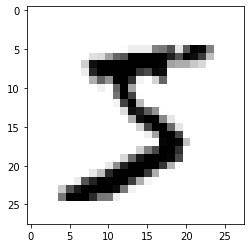

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)    # 첫 번째 이미지. cmap으로 컬러맵 설정. 
plt.show()

In [ ]:
print(y_train[0])    # 첫 번째 이미지의 정답레이블

5


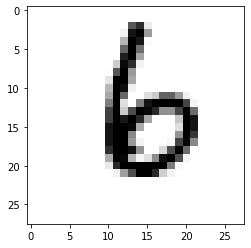

2021 번째 이미지의 숫자는 바로  6 입니다.


In [ ]:
# index에 0~59999 지정 가능
index=2020     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

숫자 손글씨 이미지의 픽셀 값은 0\~255사이의 값을 가진다.<br>
인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력을 0~1사이의 값으로 정규화시키는게 좋기 때문에 255.0으로 나누자.

In [ ]:
print('최솟값:',np.min(x_train), ' 최댓값:',np.max(x_train))

최솟값: 0  최댓값: 255


In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0             # 데이터 0~1값으로 정규화
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 설계하기

tf.keras에서 Sequential API를 사용할 것이다.<br>
Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법이다.

<br>

---

<br>

**Conv2D 레이어**의 첫 번째 인자: 사용하는 특징 수 (ex. 16, 32)
- 입력 이미지가 다양하거나 복잡해질 경우, 특징 수를 더 늘려주는 것을 고려해 볼 수있다.

<br>

**Dense 레이어**의 첫 번째 인자: 분류기에 사용되는 뉴런의 수 (ex. 32, 64, 128)
- 이 값이 클수록 복잡한 분류기를 만들 수 있다.
- 가장 마지막 Dense 레이어의 첫 번째 인자는 예측 레이블을 출력해야 하기 때문에 클래스 수로 지정한다.

In [ ]:
# Sequential API를 사용하여 LeNet이라는 딥러닝 네트워크를 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [ ]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 딥러닝 네트워크 학습시키기

딥러닝 네트워크의 입력은 (데이터개수, 이미지크기x, 이미지크기y, 채널수)의 형태를 가진다.<br>
네트워크를 설계할 때 input_shape=(28, 28, 1)로 지정했듯이 **채널수가 1이면 흑백이미지**를 의미한다. 

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


epochs=10: 전체 train set 데이터 6만개를 10번 반복 사용해서 학습을 시킨다.

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 2ms/step - loss: 0.1929 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.01

## 딥러닝 네트워크 성능 확인하기

test set을 사용하여 성능을 확인한다.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0403 - accuracy: 0.9881
test_loss: 0.040256474167108536 
test_accuracy: 0.988099992275238


In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.9797147e-08 6.9254319e-10 7.1476403e-10 3.1223304e-09 2.4323758e-11
 2.5785953e-11 2.5212905e-14 1.0000000e+00 1.2021358e-10 1.2863955e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


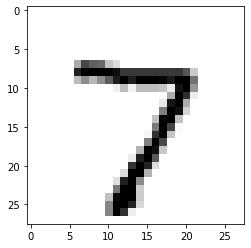

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.1241732e-05 4.7992763e-01 3.9707184e-06 8.4394569e-10 1.3460075e-06
 1.5273455e-06 5.1647890e-01 2.8401402e-08 3.5454154e-03 6.3536092e-09]
라벨: 1, 예측결과: 6


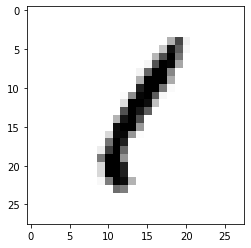

예측확률분포: [5.7809125e-06 1.4983712e-01 3.2743490e-08 4.9950918e-06 2.2878707e-03
 1.6427850e-02 2.3108594e-05 1.4598834e-05 3.0044428e-01 5.3095430e-01]
라벨: 1, 예측결과: 9


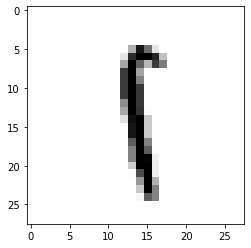

예측확률분포: [2.2705362e-04 8.1665013e-03 7.1387160e-01 2.1047967e-03 2.7991662e-02
 3.0500458e-05 5.0612427e-05 2.5621396e-03 2.4488793e-01 1.0718086e-04]
라벨: 8, 예측결과: 2


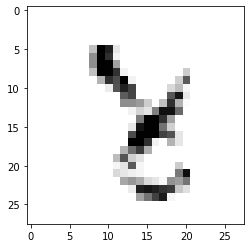

예측확률분포: [1.3329667e-05 9.3592301e-02 1.0933549e-03 1.4271154e-01 8.4582344e-02
 6.5863329e-01 1.9047592e-02 3.5539213e-12 3.2630356e-04 2.5060443e-08]
라벨: 1, 예측결과: 5


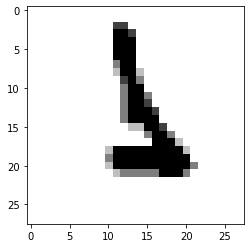

예측확률분포: [6.4163029e-01 4.7806157e-07 2.8252252e-06 1.8151435e-11 2.8322474e-04
 1.2024004e-08 3.5793215e-01 7.6415507e-13 1.5106659e-04 2.9971829e-08]
라벨: 6, 예측결과: 0


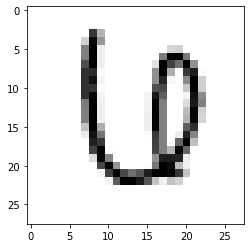

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 성능 개선하기

딥러닝 네트워크 구조 자체를 바꾸지 않고, 하이퍼파라미터를 바꿔서 다시 학습시켜 보자.

<br>

n_channel_1=16<br>
n_channel_2=32<br>
n_dense=32<br>
n_train_epoch=10<br>
> test_loss: 0.030280688777565956 <br>
test_accuracy: 0.9918000102043152

> test_loss: 0.04574832692742348 <br>
test_accuracy: 0.9872999787330627

<br>

n_channel_1=32<br>
n_channel_2=64<br>
n_dense=32<br>
n_train_epoch=10<br>
> test_loss: 0.03657081723213196 <br>
test_accuracy: 0.9908999800682068

<br>

n_channel_1=32<br>
n_channel_2=64<br>
n_dense=64<br>
n_train_epoch=10<br>
> test_loss: 0.042673829942941666 <br>
test_accuracy: 0.9914000034332275




In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               